In [13]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [14]:
np.random.seed(13) # Better use a prime number for random seed

In [15]:
def oracle(x):
  # Define an oracle that generates a parabola
  return x**2

In [16]:
n = 4 # Number of samples
sigma = .05 # Noise
nt = 1000 # Number of samples for plotting

In [17]:
x = np.random.rand(n) # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
y = oracle(x) + sigma*np.random.randn(n)

In [18]:
xt = np.linspace(0,1,nt)
yt = oracle(xt)

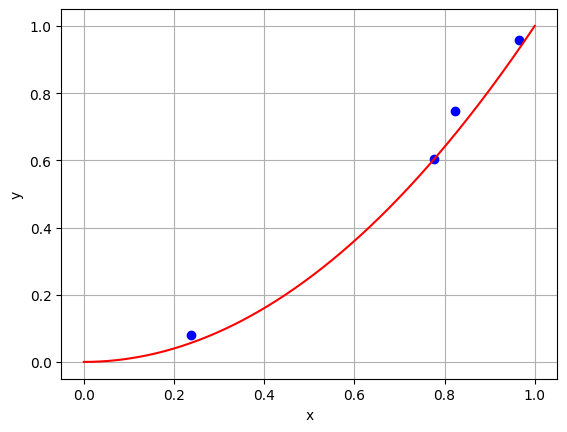

In [19]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt, yt, 'r')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

In [20]:
# Convert x and y into matrices
x = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()
xt = np.asmatrix(xt).transpose()
yt = np.asmatrix(yt).transpose()

In [21]:
# (X'*X) * c = X' * y
for p in range(0,4): # Try different values of the polynomial degree
  X = nml.ones((n,1)) # Create a matrix of ones
  Xt = nml.ones((nt,1))
  for i in range(1,p+1):
    X = np.concatenate((X,np.power(x,i)), axis = 1) # Create a matrix of powers of x
    Xt = np.concatenate((Xt,np.power(xt,i)), axis = 1)

  c = np.linalg.solve(np.matmul(np.transpose(X), X), np.matmul(np.transpose(X), y)) # Solve the linear system
  yp = np.matmul(Xt, c) # Find values of predicted y
  err = np.mean(np.abs(yp-yt)) # Compute error
  print(p, err)

0 0.3514619664434356
1 0.08054553933945253
2 0.025383386309098428
3 0.5203209996639866


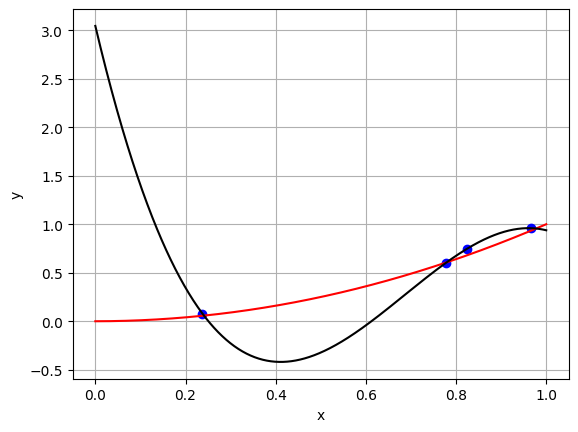

In [22]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt, yt, 'r')
ax.plot(xt, yp, 'k')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

In [23]:
p = 9 # Choose  degree of polynomial
lam = .000001 # Choose a small lambda

X = nml.ones((n,1))
Xt = nml.ones((nt,1))

In [24]:
# USE RIDGE REGRESSION
# ((X'*X) + (lambda * M)) * c = X' * y
for i in range(1,p+1):
  X = np.concatenate((X,np.power(x,i)),axis=1)
  Xt = np.concatenate((Xt,np.power(xt,i)),axis=1)
M = nml.zeros((p+1,p+1))
for i in range(2,p+1):
  for j in range(2,p+1):
    M[i,j] = i*(i-1)*j*(j-1)/(i+j-3) # Build matrix M

c = np.linalg.solve(np.matmul(np.transpose(X),X)+lam*M,np.matmul(np.transpose(X),y))
yp = np.matmul(Xt,c)
err = np.mean(np.abs(yp-yt))
print(err)


0.11277074037256783


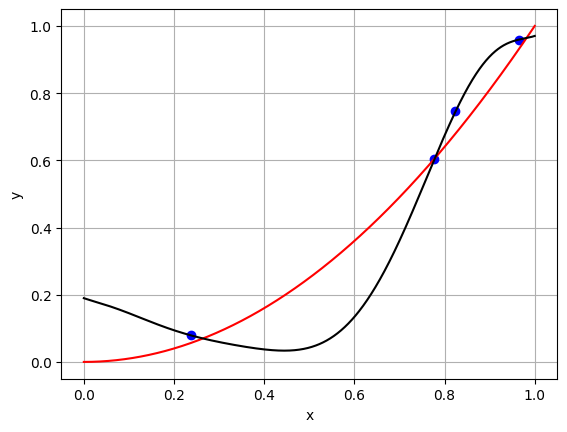

In [25]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.plot(xt,yp,'k')
ax.set(xlabel='x',ylabel='y')
ax.grid()